In [16]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [17]:
image_folder = "/kaggle/input/dataset2"
image_paths = glob.glob(os.path.join(image_folder, "*.jpg"))

images = [cv2.imread(img) for img in image_paths[:5]]
images = [cv2.resize(img, (500, 500)) for img in images if img is not None]

In [18]:
#S2

def blend_images(images, alphas):
    blended = np.zeros_like(images[0], dtype=np.float32)
    for img, alpha in zip(images, alphas):
        blended += img.astype(np.float32) * alpha
    blended = np.clip(blended, 0, 255).astype(np.uint8)
    return blended

alphas = np.linspace(0.2, 0.8, len(images))

blended_image = blend_images(images, alphas)

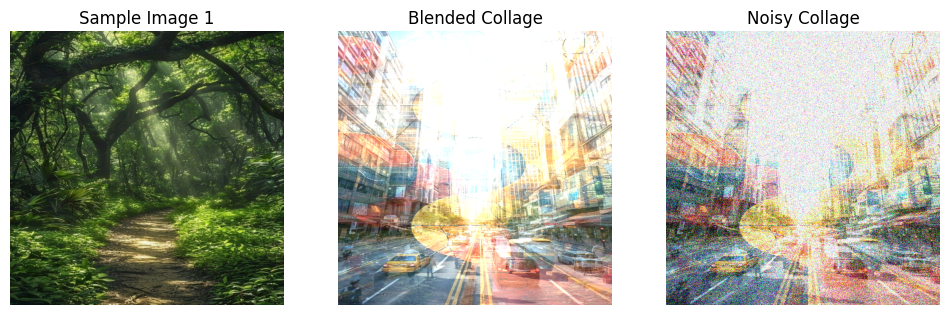

In [19]:
#S3

def add_gaussian_noise(image, mean=0, sigma=50):
    noise = np.random.normal(mean, sigma, image.shape).astype(np.float32)
    noisy_image = image.astype(np.float32) + noise
    noisy_image = np.clip(noisy_image, 0, 255).astype(np.uint8)
    return noisy_image

noisy_image = add_gaussian_noise(blended_image)

import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
plt.subplot(1, 3, 1)
plt.imshow(cv2.cvtColor(images[0], cv2.COLOR_BGR2RGB))
plt.axis('off')
plt.title("Sample Image 1")

plt.subplot(1, 3, 2)
plt.imshow(cv2.cvtColor(blended_image, cv2.COLOR_BGR2RGB))
plt.axis('off')
plt.title("Blended Collage")

plt.subplot(1, 3, 3)
plt.imshow(cv2.cvtColor(noisy_image, cv2.COLOR_BGR2RGB))
plt.axis('off')
plt.title("Noisy Collage")

plt.show()


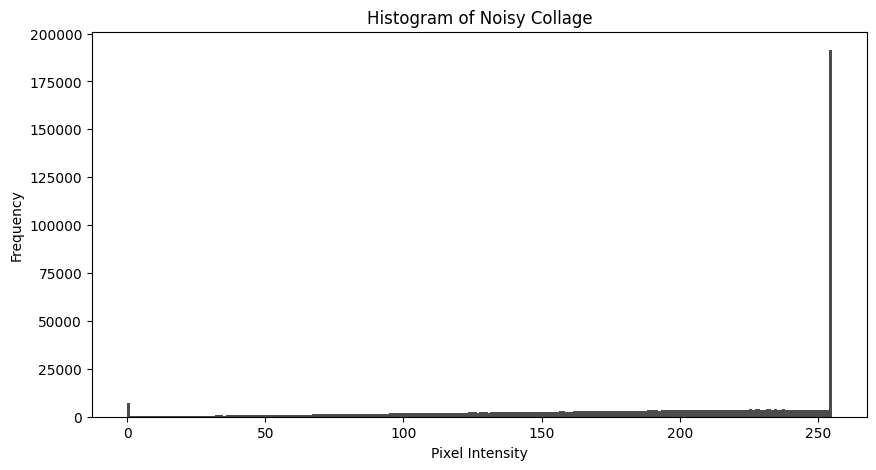

In [20]:
#plot

plt.figure(figsize=(10, 5))
plt.hist(noisy_image.ravel(), bins=256, color='black', alpha=0.7)
plt.title("Histogram of Noisy Collage")
plt.xlabel("Pixel Intensity")
plt.ylabel("Frequency")
plt.show()